In [38]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
from tqdm import tqdm
import seaborn as sns

## Scanning tags and main pages:

In [2]:
base_url = 'https://www.recetasderechupete.com/'

r = requests.get(base_url)
c = r.content

soup = BeautifulSoup(c, "html.parser")

In [3]:
container = soup.find("div", class_ = 'rdr-content')
#container = soup.find("ul", attrs= {'id': 'categoriesnav'})
#container = soup.find_all('a')

In [4]:
links = container.find_all('li')

In [5]:
list_links = []
for link in links:
    if 'https' in link.a['href'] and 'recetas' in link.a['href']:
        list_links.append(link.a['href'])
        print(link.a['href'])

https://www.recetasderechupete.com/todas/recetas/postres-dulces/
https://www.recetasderechupete.com/todas/recetas/pescados-mariscos/
https://www.recetasderechupete.com/todas/recetas/carnes-aves/
https://www.recetasderechupete.com/todas/recetas/arroces/
https://www.recetasderechupete.com/todas/recetas/pasta-recetas/
https://www.recetasderechupete.com/todas/recetas/ensaladas-verduras/
https://www.recetasderechupete.com/todas/recetas/tapas-aperitivos-pinchos/
https://www.recetasderechupete.com/todas/recetas/legumbres-sopas-guisos/
https://www.recetasderechupete.com/todas/recetas/masas-rebozados/
https://www.recetasderechupete.com/todas/recetas/patatas-salsas-guarniciones/
https://www.recetasderechupete.com/todas/recetas/ocasiones-especiales/
https://www.recetasderechupete.com/todas/recetas/bebidas-cocteles-licores/
https://www.recetasderechupete.com/recetas-faciles/
https://www.recetasderechupete.com/recetas-de-pollo/


## Scanning all the recipes pages from a single tag

In [6]:
url_example = list_links[0]
r = requests.get(url_example)
c = r.content

soup_e = BeautifulSoup(c, "html.parser")


container = soup_e.find('div', attrs= {'id': 'archive'}).find_all('div', class_='post')



In [7]:
for cont in container:
    post = cont.h2
    print(post.a['href'])
sig_pag = soup_e.find('div', class_= 'navigation').find('a', class_= 'next page-numbers')['href']
print(sig_pag)

https://www.recetasderechupete.com/como-decorar-galletas-mini-abetos-de-navidad/12009/
https://www.recetasderechupete.com/mazapanes-caseros-receta-de-navidad/11941/
https://www.recetasderechupete.com/yemas-dulces-de-santa-teresa/21217/
https://www.recetasderechupete.com/tronco-de-navidad-receta-navidena/12006/
https://www.recetasderechupete.com/panettone-panetone-paneton-o-pan-dulce-de-navidad/11944/
https://www.recetasderechupete.com/turron-de-chocolate-crujiente-postre-facil-y-rapido/12007/
https://www.recetasderechupete.com/cheesecake-de-kakis/23151/
https://www.recetasderechupete.com/tarta-queso-facil-chocolate/16416/
https://www.recetasderechupete.com/tarta-de-queso-americana-o-new-york-cheesecake/1740/
https://www.recetasderechupete.com/brownie-de-nutella/23051/
https://www.recetasderechupete.com/todas/recetas/postres-dulces/page/2/


In [16]:
sig_pag = soup_e.find('div', class_= 'navigation').find('a', class_= 'next page-numbers')['href']

In [8]:
tag_links = []

def get_tag_links(url):
    #url_example = list_links[0]
    r = requests.get(url)
    c = r.content

    soup_e = BeautifulSoup(c, "html.parser")


    container = soup_e.find('div', attrs= {'id': 'archive'}).find_all('div', class_='post')
    
    for cont in container:
        post = cont.h2
        print(post.a['href'])
        tag_links.append(post.a['href'])
    soup_e = BeautifulSoup(c, "html.parser")
    sig_pag = soup_e.find('div', class_= 'navigation').find('a', class_= 'next page-numbers')['href']
    print(sig_pag)
    try:
        get_tag_links(sig_pag)
    except:
        pass
    
    return tag_links




In [9]:
tag_links = get_tag_links(list_links[0])

https://www.recetasderechupete.com/como-decorar-galletas-mini-abetos-de-navidad/12009/
https://www.recetasderechupete.com/mazapanes-caseros-receta-de-navidad/11941/
https://www.recetasderechupete.com/yemas-dulces-de-santa-teresa/21217/
https://www.recetasderechupete.com/tronco-de-navidad-receta-navidena/12006/
https://www.recetasderechupete.com/panettone-panetone-paneton-o-pan-dulce-de-navidad/11944/
https://www.recetasderechupete.com/turron-de-chocolate-crujiente-postre-facil-y-rapido/12007/
https://www.recetasderechupete.com/cheesecake-de-kakis/23151/
https://www.recetasderechupete.com/tarta-queso-facil-chocolate/16416/
https://www.recetasderechupete.com/tarta-de-queso-americana-o-new-york-cheesecake/1740/
https://www.recetasderechupete.com/brownie-de-nutella/23051/
https://www.recetasderechupete.com/todas/recetas/postres-dulces/page/2/
https://www.recetasderechupete.com/receta-de-brownies-de-chocolate-con-nueces-forma-clasica-y-facil/1220/
https://www.recetasderechupete.com/flor-de-

https://www.recetasderechupete.com/filloas-caramelizadas-rellenas-de-crema-pastelera/7173/
https://www.recetasderechupete.com/cheesecake-o-tarta-de-queso-con-crema-tostada/19370/
https://www.recetasderechupete.com/galletas-de-avellana-y-chocolate-receta-cookies/4669/
https://www.recetasderechupete.com/flan-de-chocolate-casero/9956/
https://www.recetasderechupete.com/tarta-a-los-tres-chocolates/6004/
https://www.recetasderechupete.com/bocados-de-chocolate-o-cake-pops/7128/
https://www.recetasderechupete.com/receta-de-bizcocho-de-chocolate-irresistible/19732/
https://www.recetasderechupete.com/rosquillas-listas-san-isidro/16738/
https://www.recetasderechupete.com/bartolillos-madrilenos/16675/
https://www.recetasderechupete.com/rosquillas-tontas-san-isidro/16656/
https://www.recetasderechupete.com/todas/recetas/postres-dulces/page/12/
https://www.recetasderechupete.com/como-hacer-gominolas-caseras/21535/
https://www.recetasderechupete.com/flan-de-yogurt/12922/
https://www.recetasderechupe

https://www.recetasderechupete.com/receta-de-bizcocho-universitario-de-chocolate/1100/
https://www.recetasderechupete.com/mini-tiramisu-con-nutella/20320/
https://www.recetasderechupete.com/receta-de-pastel-de-chocolate-a-la-naranja-en-bandeja/626/
https://www.recetasderechupete.com/canas-fritas-rellenas-de-crema-de-chocolate/10079/
https://www.recetasderechupete.com/tarta-de-manzana-inglesa-apple-pie/12417/
https://www.recetasderechupete.com/receta-canas-fritas-rellenas-crema-carballino/3427/
https://www.recetasderechupete.com/receta-de-tarta-de-castanas-magostos/900/
https://www.recetasderechupete.com/palmeras-y-palmeritas-de-hojaldre/10117/
https://www.recetasderechupete.com/receta-de-crepes-suzette-postre-paso-a-paso/3461/
https://www.recetasderechupete.com/receta-de-pudin-de-chocolate/782/
https://www.recetasderechupete.com/todas/recetas/postres-dulces/page/22/
https://www.recetasderechupete.com/milhojas-de-turron/15308/
https://www.recetasderechupete.com/profiteroles-de-nata-y-ch

https://www.recetasderechupete.com/bunuelos-de-manzana/12233/
https://www.recetasderechupete.com/tostadas-francesas-o-french-toasts-un-desayuno-especial/9798/
https://www.recetasderechupete.com/sobaos-pasiegos-caseros/13532/
https://www.recetasderechupete.com/receta-galletas-avena-kiwi/17626/
https://www.recetasderechupete.com/mus-o-mousse-de-limon/13101/
https://www.recetasderechupete.com/receta-sandwiches-galleta/17309/
https://www.recetasderechupete.com/tarta-de-galletas-y-chocolate-la-de-todos-los-cumpleanos/5987/
https://www.recetasderechupete.com/mousse-de-chocolate-blanco-con-pistachos/12637/
https://www.recetasderechupete.com/receta-de-mousse-de-chocolate-a-la-naranja/1297/
https://www.recetasderechupete.com/crema-de-cacao-y-avellanas-nocilla-o-nutella-casera/6011/
https://www.recetasderechupete.com/todas/recetas/postres-dulces/page/32/
https://www.recetasderechupete.com/panacota-con-kiwi-panna-cotta/16994/
https://www.recetasderechupete.com/helado-casero-de-turron-de-jijona/59

https://www.recetasderechupete.com/receta-de-tarta-de-chocolate-y-nutella/3/
https://www.recetasderechupete.com/receta-de-coulant-de-chocolate-blanco-o-souffle-blanco/1132/
https://www.recetasderechupete.com/receta-de-pastel-de-manzana-y-mango/1395/
https://www.recetasderechupete.com/receta-de-coulant-de-turron-de-xixona/1061/
https://www.recetasderechupete.com/receta-de-tarta-de-castanas-y-almendra-lucrecia/967/
https://www.recetasderechupete.com/receta-de-baklavas-griegos-caseros/711/
https://www.recetasderechupete.com/receta-de-galaktoboureko-o-pastel-de-leche-griego/731/
https://www.recetasderechupete.com/receta-de-bizcocho-de-cafe-con-almendras/750/
https://www.recetasderechupete.com/receta-de-bizcocho-de-cerezas-de-vilarino/487/
https://www.recetasderechupete.com/receta-de-pudin-de-fresas-y-platanos-de-canarias/349/
https://www.recetasderechupete.com/todas/recetas/postres-dulces/page/42/
https://www.recetasderechupete.com/receta-de-brownies-de-chocolate-con-nueces-y-avellanas/290

## Scrapping Single Recipe:

In [10]:
url_recipe = 'https://www.recetasderechupete.com/sopa-de-calamares/23123/'

r = requests.get(url_recipe)
c = r.content

soup_recipe = BeautifulSoup(c, "html.parser")

In [11]:
## Data to get from the page:
"""
Nombre de la receta
Puntuacion
Votos
Imagen
Ingredientes
Procedimiento
Dificultad
Tiempo
N personas
precio por persona
kcalorias
etiquetas
    
"""

'\nNombre de la receta\nPuntuacion\nVotos\nImagen\nIngredientes\nProcedimiento\nDificultad\nTiempo\nN personas\nprecio por persona\nkcalorias\netiquetas\n    \n'

In [12]:
nombre = soup_recipe.find('header').h1.get_text()
print(nombre)

puntuacion = soup_recipe.find('span', class_= 'rf_average').get_text()+'/5'
print(puntuacion)

votos = soup_recipe.find('span', class_= 'def rating_total').span.get_text()
print(votos)

imagen = soup_recipe.section.find('img')['src']
print(imagen)

ingredientes = soup_recipe.section.find('div', attrs= {'id': 'ingredients'}).ul.find_all('li')
for ing in ingredientes:
    print(ing.get_text())

procedimiento = soup_recipe.section.find('div', attrs= {'itemprop': 'recipeInstructions'}).ol.find_all('li')
for i, proc in enumerate(procedimiento):
    print(str(i+1)+ '-' + proc.get_text())


info = soup_recipe.section.find('div', attrs= {'id': 'extrainfo'}).find_all('li')

dificultad = info[0].get_text()
print(dificultad)

tiempo = info[1].get_text()
print(tiempo)

n_personas = info[2].get_text()
print(n_personas)

precio_persona = info[3].get_text()
print(precio_persona)

kcalorias = info[4].get_text()
print(kcalorias)

tags_all = info[5:]
tags = []
for tag in tags_all:
    tags.append(tag.get_text())
print(tags)

Sopa de calamares
5/5
1
https://www.recetasderechupete.com/wp-content/uploads/2018/11/Sopa-de-calamares-525x360.jpg
1/2 Kg. de calamares pequeños o chipirones, limpios y troceados
2 dientes de ajo
2 cebollas medianas o una grande
3 tomates maduros o una lata de tomate triturado
4 hojas de laurel
Romero fresco
Hebras de azafrán
1 vaso de vino blanco
Sal y pimienta negra recién molida (al gusto)
Aceite de oliva virgen extra
1-Limpiamos el interior de los calamares con abundante agua y los cortamos en tiras finitas. A mi me gusta la piel que tiene el calamar, le da color y sabor. Pero para aquellas/os que nos guste, sólo tenéis que quitarla en la limpieza previa. Reservamos.
2-La otra opción y si vuestra/o pescadera/o se presta, que os limpien bien los calamares. Tendremos la mitad del trabajo de la receta hecho.
3-Pelamos y picamos el ajo y la cebolla. Lavamos y troceamos los tomates en dados.
4-Calentamos aceite en una cazuela y cuando esté caliente añadimos primero la cebolla. Cuando e

## Getting all the data !!

In [13]:
base_url = 'https://www.recetasderechupete.com/'

r = requests.get(base_url)
c = r.content

soup = BeautifulSoup(c, "html.parser")

container = soup.find("div", class_ = 'rdr-content')

links = container.find_all('li')
list_links = []
for link in links:
    if 'https' in link.a['href'] and 'recetas' in link.a['href']:
        list_links.append((link.a['href'], link.a.get_text()))
        print(link.a['href'], link.a.get_text())
        

https://www.recetasderechupete.com/todas/recetas/postres-dulces/ Postres y dulces
https://www.recetasderechupete.com/todas/recetas/pescados-mariscos/ Pescado y marisco
https://www.recetasderechupete.com/todas/recetas/carnes-aves/ Pollo y otras carnes
https://www.recetasderechupete.com/todas/recetas/arroces/ Arroz
https://www.recetasderechupete.com/todas/recetas/pasta-recetas/ Pasta
https://www.recetasderechupete.com/todas/recetas/ensaladas-verduras/ Ensaladas y verduras
https://www.recetasderechupete.com/todas/recetas/tapas-aperitivos-pinchos/ Tapas y aperitivos
https://www.recetasderechupete.com/todas/recetas/legumbres-sopas-guisos/ Sopas, guisos y legumbres
https://www.recetasderechupete.com/todas/recetas/masas-rebozados/ Masas y rebozados
https://www.recetasderechupete.com/todas/recetas/patatas-salsas-guarniciones/ Patatas, salsas y guarniciones
https://www.recetasderechupete.com/todas/recetas/ocasiones-especiales/ Para ocasiones especiales
https://www.recetasderechupete.com/todas/r

In [14]:
tag_links = []

def get_tag_links(url):
    
    #url_example = list_links[0]
    r = requests.get(url)
    c = r.content

    soup_e = BeautifulSoup(c, "html.parser")


    container = soup_e.find('div', attrs= {'id': 'archive'}).find_all('div', class_='post')
    
    for cont in container:
        post = cont.h2
        print(post.a['href'])
        tag_links.append(post.a['href'])
    soup_e = BeautifulSoup(c, "html.parser")
    sig_pag = soup_e.find('div', class_= 'navigation').find('a', class_= 'next page-numbers')['href']
    print(sig_pag)
    try:
        get_tag_links(sig_pag)
    except:
        pass
    
    return tag_links


In [15]:
list_links

[('https://www.recetasderechupete.com/todas/recetas/postres-dulces/',
  'Postres y dulces'),
 ('https://www.recetasderechupete.com/todas/recetas/pescados-mariscos/',
  'Pescado y marisco'),
 ('https://www.recetasderechupete.com/todas/recetas/carnes-aves/',
  'Pollo y otras carnes'),
 ('https://www.recetasderechupete.com/todas/recetas/arroces/', 'Arroz'),
 ('https://www.recetasderechupete.com/todas/recetas/pasta-recetas/', 'Pasta'),
 ('https://www.recetasderechupete.com/todas/recetas/ensaladas-verduras/',
  'Ensaladas y verduras'),
 ('https://www.recetasderechupete.com/todas/recetas/tapas-aperitivos-pinchos/',
  'Tapas y aperitivos'),
 ('https://www.recetasderechupete.com/todas/recetas/legumbres-sopas-guisos/',
  'Sopas, guisos y legumbres'),
 ('https://www.recetasderechupete.com/todas/recetas/masas-rebozados/',
  'Masas y rebozados'),
 ('https://www.recetasderechupete.com/todas/recetas/patatas-salsas-guarniciones/',
  'Patatas, salsas y guarniciones'),
 ('https://www.recetasderechupete

In [16]:
l = get_tag_links(list_links[1][0])

https://www.recetasderechupete.com/receta-gallega-de-almejas-a-la-marinera/2530/
https://www.recetasderechupete.com/langostinos-al-curry/15580/
https://www.recetasderechupete.com/sopa-de-calamares/23123/
https://www.recetasderechupete.com/sopa-de-pescado-y-marisco/7127/
https://www.recetasderechupete.com/caldo-de-pescado-o-fumet-casero/21312/
https://www.recetasderechupete.com/empanada-de-bonito-en-conserva/23074/
https://www.recetasderechupete.com/albondigas-con-sepia-mandonguilles-amb-sipia/13117/
https://www.recetasderechupete.com/sopa-marinera-con-arroz/18328/
https://www.recetasderechupete.com/como-hacer-berberechos-al-vapor/18451/
https://www.recetasderechupete.com/sopa-de-pescado-a-lo-pobre/22773/
https://www.recetasderechupete.com/todas/recetas/pescados-mariscos/page/2/
https://www.recetasderechupete.com/espaguetis-con-almejas-mejillone-o-spaguetti-a-le-vongole-receta-italiana/5528/
https://www.recetasderechupete.com/filloas-rellenas-de-merluza-do-pincho/22506/
https://www.rece

https://www.recetasderechupete.com/tacos-de-langostinos-con-salsa-de-aguacate/20763/
https://www.recetasderechupete.com/mejillones-al-horno/20792/
https://www.recetasderechupete.com/receta-de-croquetas-de-bacalao/192/
https://www.recetasderechupete.com/bacalao-guisado-alcachofas/16439/
https://www.recetasderechupete.com/albondigas-de-bacalao/8334/
https://www.recetasderechupete.com/almejas-con-patatas-guiso-marinero/11992/
https://www.recetasderechupete.com/mejillones-gratinados/15424/
https://www.recetasderechupete.com/merluza-a-la-gallega-un-clasico-de-la-cocina-gallega/6616/
https://www.recetasderechupete.com/receta-de-vieiras-a-la-gallega/19/
https://www.recetasderechupete.com/bacalao-al-pil-pil-receta-tradicional-vasca/7762/
https://www.recetasderechupete.com/todas/recetas/pescados-mariscos/page/12/
https://www.recetasderechupete.com/croquetas-de-gambas/12486/
https://www.recetasderechupete.com/tacos-de-langostinos/18699/
https://www.recetasderechupete.com/receta-de-tigres-o-croqu

https://www.recetasderechupete.com/calabacines-rellenos-de-mejillones/15959/
https://www.recetasderechupete.com/patatas-rellenas-de-atun/15579/
https://www.recetasderechupete.com/receta-de-angurinas-al-ajillo/638/
https://www.recetasderechupete.com/ensaladilla-de-salmon-ahumado/15287/
https://www.recetasderechupete.com/langostinos-o-gambas-como-preparar-un-caldo-o-aceite-aromatizado/7317/
https://www.recetasderechupete.com/vieiras-sobre-crema-de-zanahorias-y-calabaza/4545/
https://www.recetasderechupete.com/pate-de-salmon/14705/
https://www.recetasderechupete.com/espinacas-con-gambas-en-salsa-de-tomate-casero/5779/
https://www.recetasderechupete.com/milhojas-de-trucha-con-patatas-y-verduras/7497/
https://www.recetasderechupete.com/dorada-al-horno-con-almendras/13481/
https://www.recetasderechupete.com/todas/recetas/pescados-mariscos/page/22/
https://www.recetasderechupete.com/bacalao-al-azafran/12918/
https://www.recetasderechupete.com/sandwich-casero-de-atun-y-soja/12907/
https://www.

In [17]:
l

['https://www.recetasderechupete.com/receta-gallega-de-almejas-a-la-marinera/2530/',
 'https://www.recetasderechupete.com/langostinos-al-curry/15580/',
 'https://www.recetasderechupete.com/sopa-de-calamares/23123/',
 'https://www.recetasderechupete.com/sopa-de-pescado-y-marisco/7127/',
 'https://www.recetasderechupete.com/caldo-de-pescado-o-fumet-casero/21312/',
 'https://www.recetasderechupete.com/empanada-de-bonito-en-conserva/23074/',
 'https://www.recetasderechupete.com/albondigas-con-sepia-mandonguilles-amb-sipia/13117/',
 'https://www.recetasderechupete.com/sopa-marinera-con-arroz/18328/',
 'https://www.recetasderechupete.com/como-hacer-berberechos-al-vapor/18451/',
 'https://www.recetasderechupete.com/sopa-de-pescado-a-lo-pobre/22773/',
 'https://www.recetasderechupete.com/espaguetis-con-almejas-mejillone-o-spaguetti-a-le-vongole-receta-italiana/5528/',
 'https://www.recetasderechupete.com/filloas-rellenas-de-merluza-do-pincho/22506/',
 'https://www.recetasderechupete.com/fish-a

In [19]:
all_recipes = []


for link in list_links:
    print(link)
    t_links = []
    try:
        t_links = get_tag_links(link[0])
        #print(t_links)
        for lin in t_links:
            all_recipes.append(lin)
        #    print('ok')
    except:
        print('error processing', link)

('https://www.recetasderechupete.com/todas/recetas/postres-dulces/', 'Postres y dulces')
https://www.recetasderechupete.com/como-decorar-galletas-mini-abetos-de-navidad/12009/
https://www.recetasderechupete.com/mazapanes-caseros-receta-de-navidad/11941/
https://www.recetasderechupete.com/yemas-dulces-de-santa-teresa/21217/
https://www.recetasderechupete.com/tronco-de-navidad-receta-navidena/12006/
https://www.recetasderechupete.com/panettone-panetone-paneton-o-pan-dulce-de-navidad/11944/
https://www.recetasderechupete.com/turron-de-chocolate-crujiente-postre-facil-y-rapido/12007/
https://www.recetasderechupete.com/cheesecake-de-kakis/23151/
https://www.recetasderechupete.com/tarta-queso-facil-chocolate/16416/
https://www.recetasderechupete.com/tarta-de-queso-americana-o-new-york-cheesecake/1740/
https://www.recetasderechupete.com/brownie-de-nutella/23051/
https://www.recetasderechupete.com/todas/recetas/postres-dulces/page/2/
https://www.recetasderechupete.com/receta-de-brownies-de-cho

https://www.recetasderechupete.com/filloas-caramelizadas-rellenas-de-crema-pastelera/7173/
https://www.recetasderechupete.com/cheesecake-o-tarta-de-queso-con-crema-tostada/19370/
https://www.recetasderechupete.com/galletas-de-avellana-y-chocolate-receta-cookies/4669/
https://www.recetasderechupete.com/flan-de-chocolate-casero/9956/
https://www.recetasderechupete.com/tarta-a-los-tres-chocolates/6004/
https://www.recetasderechupete.com/bocados-de-chocolate-o-cake-pops/7128/
https://www.recetasderechupete.com/receta-de-bizcocho-de-chocolate-irresistible/19732/
https://www.recetasderechupete.com/rosquillas-listas-san-isidro/16738/
https://www.recetasderechupete.com/bartolillos-madrilenos/16675/
https://www.recetasderechupete.com/rosquillas-tontas-san-isidro/16656/
https://www.recetasderechupete.com/todas/recetas/postres-dulces/page/12/
https://www.recetasderechupete.com/como-hacer-gominolas-caseras/21535/
https://www.recetasderechupete.com/flan-de-yogurt/12922/
https://www.recetasderechupe

https://www.recetasderechupete.com/receta-de-bizcocho-universitario-de-chocolate/1100/
https://www.recetasderechupete.com/mini-tiramisu-con-nutella/20320/
https://www.recetasderechupete.com/receta-de-pastel-de-chocolate-a-la-naranja-en-bandeja/626/
https://www.recetasderechupete.com/canas-fritas-rellenas-de-crema-de-chocolate/10079/
https://www.recetasderechupete.com/tarta-de-manzana-inglesa-apple-pie/12417/
https://www.recetasderechupete.com/receta-canas-fritas-rellenas-crema-carballino/3427/
https://www.recetasderechupete.com/receta-de-tarta-de-castanas-magostos/900/
https://www.recetasderechupete.com/palmeras-y-palmeritas-de-hojaldre/10117/
https://www.recetasderechupete.com/receta-de-crepes-suzette-postre-paso-a-paso/3461/
https://www.recetasderechupete.com/receta-de-pudin-de-chocolate/782/
https://www.recetasderechupete.com/todas/recetas/postres-dulces/page/22/
https://www.recetasderechupete.com/milhojas-de-turron/15308/
https://www.recetasderechupete.com/profiteroles-de-nata-y-ch

https://www.recetasderechupete.com/bunuelos-de-manzana/12233/
https://www.recetasderechupete.com/tostadas-francesas-o-french-toasts-un-desayuno-especial/9798/
https://www.recetasderechupete.com/sobaos-pasiegos-caseros/13532/
https://www.recetasderechupete.com/receta-galletas-avena-kiwi/17626/
https://www.recetasderechupete.com/mus-o-mousse-de-limon/13101/
https://www.recetasderechupete.com/receta-sandwiches-galleta/17309/
https://www.recetasderechupete.com/tarta-de-galletas-y-chocolate-la-de-todos-los-cumpleanos/5987/
https://www.recetasderechupete.com/mousse-de-chocolate-blanco-con-pistachos/12637/
https://www.recetasderechupete.com/receta-de-mousse-de-chocolate-a-la-naranja/1297/
https://www.recetasderechupete.com/crema-de-cacao-y-avellanas-nocilla-o-nutella-casera/6011/
https://www.recetasderechupete.com/todas/recetas/postres-dulces/page/32/
https://www.recetasderechupete.com/panacota-con-kiwi-panna-cotta/16994/
https://www.recetasderechupete.com/helado-casero-de-turron-de-jijona/59

https://www.recetasderechupete.com/receta-de-tarta-de-chocolate-y-nutella/3/
https://www.recetasderechupete.com/receta-de-coulant-de-chocolate-blanco-o-souffle-blanco/1132/
https://www.recetasderechupete.com/receta-de-pastel-de-manzana-y-mango/1395/
https://www.recetasderechupete.com/receta-de-coulant-de-turron-de-xixona/1061/
https://www.recetasderechupete.com/receta-de-tarta-de-castanas-y-almendra-lucrecia/967/
https://www.recetasderechupete.com/receta-de-baklavas-griegos-caseros/711/
https://www.recetasderechupete.com/receta-de-galaktoboureko-o-pastel-de-leche-griego/731/
https://www.recetasderechupete.com/receta-de-bizcocho-de-cafe-con-almendras/750/
https://www.recetasderechupete.com/receta-de-bizcocho-de-cerezas-de-vilarino/487/
https://www.recetasderechupete.com/receta-de-pudin-de-fresas-y-platanos-de-canarias/349/
https://www.recetasderechupete.com/todas/recetas/postres-dulces/page/42/
https://www.recetasderechupete.com/receta-de-brownies-de-chocolate-con-nueces-y-avellanas/290

https://www.recetasderechupete.com/salmon-con-patatas-y-verduras/21097/
https://www.recetasderechupete.com/salmon-en-papillote-con-salsa-holandesa/13198/
https://www.recetasderechupete.com/salmon-al-horno-con-verduras/11461/
https://www.recetasderechupete.com/lubina-espalda-horno/21052/
https://www.recetasderechupete.com/rodaballo-al-horno/11460/
https://www.recetasderechupete.com/bacalao-al-ajoarriero-de-cuenca/9836/
https://www.recetasderechupete.com/merluza-en-salsa-verde-a-la-vasca-receta/4445/
https://www.recetasderechupete.com/fabes-con-almejas-receta-asturiana-paso-a-paso/5456/
https://www.recetasderechupete.com/alcachofas-con-almejas/13106/
https://www.recetasderechupete.com/como-hacer-sepia-al-ajillo/20941/
https://www.recetasderechupete.com/todas/recetas/pescados-mariscos/page/11/
https://www.recetasderechupete.com/tacos-de-langostinos-con-salsa-de-aguacate/20763/
https://www.recetasderechupete.com/mejillones-al-horno/20792/
https://www.recetasderechupete.com/receta-de-croque

https://www.recetasderechupete.com/pulpo-gallego-a-la-plancha-o-frito-receta-paso-a-paso/3933/
https://www.recetasderechupete.com/ensalada-marinera-de-san-juan-receta-con-sardinas/3724/
https://www.recetasderechupete.com/sepia-almejas-guisantes/16970/
https://www.recetasderechupete.com/calamares-a-la-malaguena/16944/
https://www.recetasderechupete.com/almejas-al-vino-blanco/16924/
https://www.recetasderechupete.com/receta-de-huevos-rotos-con-gulas-al-ajillo/1136/
https://www.recetasderechupete.com/patatas-rellenas-pescado/16589/
https://www.recetasderechupete.com/arroz-marinero-alcachofas/16570/
https://www.recetasderechupete.com/bacalao-a-la-vizcaina/10150/
https://www.recetasderechupete.com/guiso-de-bacalao-con-patatas-y-verduras-receta-paso-a-paso/3455/
https://www.recetasderechupete.com/todas/recetas/pescados-mariscos/page/21/
https://www.recetasderechupete.com/calabacines-rellenos-de-mejillones/15959/
https://www.recetasderechupete.com/patatas-rellenas-de-atun/15579/
https://www.r

('https://www.recetasderechupete.com/todas/recetas/carnes-aves/', 'Pollo y otras carnes')
https://www.recetasderechupete.com/cocido-madrileno/6531/
https://www.recetasderechupete.com/pollo-relleno-arrollado-de-pollo-especial-navidad/12008/
https://www.recetasderechupete.com/roti-de-ternera-con-jamon-y-queso/12890/
https://www.recetasderechupete.com/pollo-campero-o-de-corral-guisado/23210/
https://www.recetasderechupete.com/capon-relleno-de-navidad/23193/
https://www.recetasderechupete.com/pollo-al-curry-express-curry-rapido/23145/
https://www.recetasderechupete.com/pollo-al-curry-con-arroz-basmati-receta-paso-a-paso/8199/
https://www.recetasderechupete.com/cuscus-con-pollo-al-curry/19485/
https://www.recetasderechupete.com/papas-con-carne/23053/
https://www.recetasderechupete.com/pavo-relleno-asado-receta-accion-de-gracias/8877/
https://www.recetasderechupete.com/todas/recetas/carnes-aves/page/2/
https://www.recetasderechupete.com/fricando-de-ternera-receta-catalana/12908/
https://www.

https://www.recetasderechupete.com/tacos-mexicanos-tinga-pollo/16772/
https://www.recetasderechupete.com/croquetas-sin-gluten/20861/
https://www.recetasderechupete.com/patatas-a-la-riojana-o-guiso-de-patatas-con-chorizo/7094/
https://www.recetasderechupete.com/potaje-o-puchero-canario/10607/
https://www.recetasderechupete.com/estofado-de-cerdo/19891/
https://www.recetasderechupete.com/receta-de-cocido-gallego-chef-m%c2%aa-rosa/976/
https://www.recetasderechupete.com/solomillo-a-la-pimienta/20815/
https://www.recetasderechupete.com/champinones-rellenos-carne-al-horno/18790/
https://www.recetasderechupete.com/croquetas-caseras-de-pollo/12145/
https://www.recetasderechupete.com/lomo-cerdo-la-gallega-patatas/19331/
https://www.recetasderechupete.com/todas/recetas/carnes-aves/page/12/
https://www.recetasderechupete.com/lomo-cerdo-la-gallega-patatas/19331/
https://www.recetasderechupete.com/pote-gallego-guiso-tradicional/12321/
https://www.recetasderechupete.com/pollo-a-la-jardinera/14315/
h

https://www.recetasderechupete.com/rabo-a-la-cordobesa-y-berenjenas-con-miel/18385/
https://www.recetasderechupete.com/codornices-a-la-cazadora/18356/
https://www.recetasderechupete.com/pollo-en-salsa-de-nata/13175/
https://www.recetasderechupete.com/receta-de-jarrete-de-ternera-galega-chef-garriga/1000/
https://www.recetasderechupete.com/capon-relleno-de-castanas-pinones-y-setas-receta-navidena/4722/
https://www.recetasderechupete.com/pavo-relleno-de-navidad-al-cava/17958/
https://www.recetasderechupete.com/pierna-de-cordero-rellena-al-horno/11943/
https://www.recetasderechupete.com/solomillo-de-cerdo-al-whisky/13113/
https://www.recetasderechupete.com/lasana-de-pollo/18091/
https://www.recetasderechupete.com/ternera-guisada-carne-gobernada/18041/
https://www.recetasderechupete.com/todas/recetas/carnes-aves/page/22/
https://www.recetasderechupete.com/arroz-con-pollo-y-conejo/14752/
https://www.recetasderechupete.com/croquetas-lacon-gallego/17986/
https://www.recetasderechupete.com/cer

https://www.recetasderechupete.com/arroz-con-verduras-y-setas-arroz-viudo/8248/
https://www.recetasderechupete.com/arroz-negro-valenciano/21203/
https://www.recetasderechupete.com/paella-de-verduras/22205/
https://www.recetasderechupete.com/paella-valenciana/21607/
https://www.recetasderechupete.com/receta-arroz-caldoso-mejillones-rape/16333/
https://www.recetasderechupete.com/arroz-con-verduras/22141/
https://www.recetasderechupete.com/ensalada-de-arroz-veraniega/22125/
https://www.recetasderechupete.com/arroz-negro-con-verduras/21991/
https://www.recetasderechupete.com/ensalada-campera-con-arroz/22128/
https://www.recetasderechupete.com/paella-de-mariscos/22105/
https://www.recetasderechupete.com/todas/recetas/arroces/page/3/
https://www.recetasderechupete.com/arroz-con-leche-al-estilo-asturiano-receta-tradicional-paso-a-paso/3595/
https://www.recetasderechupete.com/ensalada-de-arroz/11463/
https://www.recetasderechupete.com/receta-de-arroz-con-conejo-y-pollo/609/
https://www.recetas

https://www.recetasderechupete.com/receta-de-espaguetis-al-nero-di-sepia-con-gulas-y-gambas/610/
https://www.recetasderechupete.com/receta-de-fideos-japoneses-udon-noodle-con-pollo-al-curry/509/
https://www.recetasderechupete.com/receta-de-espaguetis-con-pollo-y-champinones/423/
https://www.recetasderechupete.com/receta-de-ensalada-gigli/63/
('https://www.recetasderechupete.com/todas/recetas/ensaladas-verduras/', 'Ensaladas y verduras')
https://www.recetasderechupete.com/setas-en-tempura-con-salsa-alioli-tecnica-de-rebozado/6448/
https://www.recetasderechupete.com/ensalada-templada-de-fabes-al-cabrales/11750/
https://www.recetasderechupete.com/pimientos-asados-al-horno/10050/
https://www.recetasderechupete.com/calabaza-de-halloween-como-disenar-y-decorar-tu-calabaza/22861/
https://www.recetasderechupete.com/macarrones-con-berenjenas-pasta-con-le-melanzane/11775/
https://www.recetasderechupete.com/timbal-de-verduras-con-pavo/22711/
https://www.recetasderechupete.com/crema-de-calabaza-y-

https://www.recetasderechupete.com/calabacines-rellenos-de-pisto-de-mencia-y-solomillos-de-pollo/6504/
https://www.recetasderechupete.com/calabacines-rellenos-de-carne-receta-paso-a-paso/4412/
https://www.recetasderechupete.com/ensalada-nizarda-o-salade-nicoise-a-mi-manera/2031/
https://www.recetasderechupete.com/ensalada-de-pasta/10229/
https://www.recetasderechupete.com/ensalada-fresca-de-pasta-y-manzana-receta-paso-a-paso/3584/
https://www.recetasderechupete.com/samosas-vegetales/17096/
https://www.recetasderechupete.com/ensalada-marinera-de-san-juan-receta-con-sardinas/3724/
https://www.recetasderechupete.com/escalivada-de-verduras-asadas/13123/
https://www.recetasderechupete.com/huevos-rellenos-de-ensaladilla-rusa/13513/
https://www.recetasderechupete.com/alcachofas-con-jamon/16611/
https://www.recetasderechupete.com/todas/recetas/ensaladas-verduras/page/12/
https://www.recetasderechupete.com/receta-alcachofas-rebozadas-en-salsa/13015/
https://www.recetasderechupete.com/receta-de-

https://www.recetasderechupete.com/receta-de-humus-y-tahini-pure-de-garbanzos/3864/
https://www.recetasderechupete.com/mejillones-a-la-marinera-receta-facil-y-rapida/9923/
https://www.recetasderechupete.com/receta-de-ensaladilla-rusa-casera-a-la-espanola/1775/
https://www.recetasderechupete.com/empanadillas-o-empanadas-faciles-y-rapidas/12482/
https://www.recetasderechupete.com/alitas-de-pollo-al-horno-con-salsa-de-soja-miel-y-limon/9995/
https://www.recetasderechupete.com/empanadillas-caseras-de-atun/13247/
https://www.recetasderechupete.com/mejillones-en-salsa-picante-o-tigres-rabiosos/8012/
https://www.recetasderechupete.com/salmon-ahumado-con-salsa-tartara/15328/
https://www.recetasderechupete.com/sardinas-asadas-como-hacerlas-en-el-horno-de-casa-sin-olores/10133/
https://www.recetasderechupete.com/tabule-con-atun/13121/
https://www.recetasderechupete.com/todas/recetas/tapas-aperitivos-pinchos/page/4/
https://www.recetasderechupete.com/huevos-benedict-o-benedictine-eggs-benedict/12

https://www.recetasderechupete.com/souffle-de-queso/11369/
https://www.recetasderechupete.com/tortilla-rellena/11580/
https://www.recetasderechupete.com/pizza-vegetal-como-preparar-pizza-casera-con-vegetales/9987/
https://www.recetasderechupete.com/receta-de-pulpo-a-la-gallega-con-patatas/1015/
https://www.recetasderechupete.com/mejillones-con-trampo/10092/
https://www.recetasderechupete.com/como-preparar-una-tortilla-vegetal-o-con-verduras/9967/
https://www.recetasderechupete.com/sandwich-croque-monsieur/9519/
https://www.recetasderechupete.com/alitas-de-pollo-crujientes-al-horno/8731/
https://www.recetasderechupete.com/bocaditos-jamon-con-setas-y-tomate/8526/
https://www.recetasderechupete.com/minicocottes-de-arroz-con-huevos-de-codorniz/8318/
https://www.recetasderechupete.com/todas/recetas/tapas-aperitivos-pinchos/page/14/
https://www.recetasderechupete.com/albondigas-de-queso-boffard-frutos-secos-y-tallarines-de-judia-verde/2252/
https://www.recetasderechupete.com/mejillones-en-sa

https://www.recetasderechupete.com/callos-a-la-gallega-receta-de-la-abuela/15532/
https://www.recetasderechupete.com/receta-guiso-carne-ternera-estofada/17688/
https://www.recetasderechupete.com/conejo-con-tomate/10952/
https://www.recetasderechupete.com/garbanzos-con-morcilla/13574/
https://www.recetasderechupete.com/guiso-de-bacalao-con-patatas-y-verduras-receta-paso-a-paso/3455/
https://www.recetasderechupete.com/receta-de-pollo-a-la-catalana/16034/
https://www.recetasderechupete.com/estofado-de-ternera-al-vino-tinto/15511/
https://www.recetasderechupete.com/vieiras-sobre-crema-de-zanahorias-y-calabaza/4545/
https://www.recetasderechupete.com/alubias-rojas-o-caparron-pinto-con-verduras/7538/
https://www.recetasderechupete.com/judias-pintas-con-chorizo/13572/
https://www.recetasderechupete.com/todas/recetas/legumbres-sopas-guisos/page/9/
https://www.recetasderechupete.com/marmitako-de-bacalao/12762/
https://www.recetasderechupete.com/guiso-de-patatas-con-calamares/11767/
https://www.

https://www.recetasderechupete.com/masa-de-hojaldre-casero/13573/
https://www.recetasderechupete.com/pizza-margarita/13537/
https://www.recetasderechupete.com/pizza-casera-cuatro-quesos/10469/
https://www.recetasderechupete.com/croquetas-lacon-gallego/17986/
https://www.recetasderechupete.com/san-jacobo-casero-receta-facil-paso-a-paso/9816/
https://www.recetasderechupete.com/pizza-caprichosa/13538/
https://www.recetasderechupete.com/receta-de-pseftokefedes-o-albondigas-de-tomate-griegas/732/
https://www.recetasderechupete.com/receta-de-crepes-y-filloas-como-prepararlas-paso-a-paso/2798/
https://www.recetasderechupete.com/muffins-salados-con-tomate-seco/13227/
https://www.recetasderechupete.com/pastel-sueco-de-queso-vasterbottenostpaj/13206/
https://www.recetasderechupete.com/todas/recetas/masas-rebozados/page/9/
https://www.recetasderechupete.com/cronuts-caseros-receta-paso-a-paso/12725/
https://www.recetasderechupete.com/souffle-o-sufle-de-salmon-a-las-5-pimientas/11751/
https://www.r

https://www.recetasderechupete.com/patatas-al-ajopollo-con-huevo-poche-receta-paso-a-paso/3256/
https://www.recetasderechupete.com/ensalada-de-patatas-aguacates-pimiento-y-anchoas/1998/
https://www.recetasderechupete.com/ensalada-de-patatas-ventresca-y-queso-de-oveja/1892/
https://www.recetasderechupete.com/receta-de-ensalada-marinera-o-salade-mariniere/1884/
https://www.recetasderechupete.com/huevos-rotos-con-pulpo-y-gambas-al-ajillo/1439/
https://www.recetasderechupete.com/receta-de-tosta-de-huevos-rotos-o-estrellados-con-jamon/1166/
('https://www.recetasderechupete.com/todas/recetas/ocasiones-especiales/', 'Para ocasiones especiales')
https://www.recetasderechupete.com/pollo-relleno-arrollado-de-pollo-especial-navidad/12008/
https://www.recetasderechupete.com/receta-gallega-de-almejas-a-la-marinera/2530/
https://www.recetasderechupete.com/pavo-relleno-asado-receta-accion-de-gracias/8877/
https://www.recetasderechupete.com/brazo-de-gitano-con-crema-de-castanas/15032/
https://www.rece

https://www.recetasderechupete.com/receta-leche-merengada/19767/
https://www.recetasderechupete.com/smoothie-de-fresa/19508/
https://www.recetasderechupete.com/receta-da-queimada-gallega/762/
https://www.recetasderechupete.com/granizado-de-citricos/8389/
https://www.recetasderechupete.com/smoothies-o-batidos-de-frutas/12904/
https://www.recetasderechupete.com/como-hacer-un-mojito-cubano-perfecto/16486/
https://www.recetasderechupete.com/receta-de-licor-cafe-gallego/597/
https://www.recetasderechupete.com/como-hacer-un-bloody-mary/16360/
https://www.recetasderechupete.com/preparar-una-autentica-caipirina/16352/
https://www.recetasderechupete.com/2-cocteles-de-whisky-para-estas-fiestas/15291/
https://www.recetasderechupete.com/todas/recetas/bebidas-cocteles-licores/page/2/
https://www.recetasderechupete.com/cafe-de-pota-pote-o-puchero-en-oscarontheway/13370/
('https://www.recetasderechupete.com/recetas-faciles/', 'Recetas fáciles')
error processing ('https://www.recetasderechupete.com/re

In [20]:
all_recipes

['https://www.recetasderechupete.com/receta-gallega-de-almejas-a-la-marinera/2530/',
 'https://www.recetasderechupete.com/langostinos-al-curry/15580/',
 'https://www.recetasderechupete.com/sopa-de-calamares/23123/',
 'https://www.recetasderechupete.com/sopa-de-pescado-y-marisco/7127/',
 'https://www.recetasderechupete.com/caldo-de-pescado-o-fumet-casero/21312/',
 'https://www.recetasderechupete.com/empanada-de-bonito-en-conserva/23074/',
 'https://www.recetasderechupete.com/albondigas-con-sepia-mandonguilles-amb-sipia/13117/',
 'https://www.recetasderechupete.com/sopa-marinera-con-arroz/18328/',
 'https://www.recetasderechupete.com/como-hacer-berberechos-al-vapor/18451/',
 'https://www.recetasderechupete.com/sopa-de-pescado-a-lo-pobre/22773/',
 'https://www.recetasderechupete.com/espaguetis-con-almejas-mejillone-o-spaguetti-a-le-vongole-receta-italiana/5528/',
 'https://www.recetasderechupete.com/filloas-rellenas-de-merluza-do-pincho/22506/',
 'https://www.recetasderechupete.com/fish-a

In [21]:
len(all_recipes)

18856

In [34]:
df = pd.DataFrame(columns = ['nombre', 'puntuacion', 'votos', 'imagen', 'ingredientes', 'procedimiento',\
                            'dificultad', 'tiempo', 'n_personas', 'precio_persona', 'kcalorias',\
                            'tags'])

for url in tqdm(all_recipes):

    r = requests.get(url)
    c = r.content

    soup_recipe = BeautifulSoup(c, "html.parser")
    
    try: 
        nombre = soup_recipe.find('header').h1.get_text()
        #print(nombre)
    except:
        nombre = ''
    
    try: 
        puntuacion = soup_recipe.find('span', class_= 'rf_average').get_text()+'/5'
        #print(puntuacion)
    except:
        puntuacion = ''
    
    try:
        votos = soup_recipe.find('span', class_= 'def rating_total').span.get_text()
        #print(votos)
    except:
        votos = 0
    
    try:
        imagen = soup_recipe.section.find('img')['src']
        #print(imagen)
    except:
        imagen = ''

    ingredientes = []
    try:
        ingredientes_all = soup_recipe.section.find('div', attrs= {'id': 'ingredients'}).ul.find_all('li')
        for ing in ingredientes_all:
            #print(ing.get_text())
            ingredientes.append(ing.get_text())
    except:
        ingredientes = []
        
    procedimiento = []
    try: 
        procedimiento_all = soup_recipe.section.find('div', attrs= {'itemprop': 'recipeInstructions'}).ol.find_all('li')
        for i, proc in enumerate(procedimiento_all):
            #print(str(i+1)+ '-' + proc.get_text())
            procedimiento.append(str(i+1)+ '-' + proc.get_text())
    except:
        procedimiento = []

    try:
        info = soup_recipe.section.find('div', attrs= {'id': 'extrainfo'}).find_all('li')

        dificultad = info[0].get_text()
        #print(dificultad)

        tiempo = info[1].get_text()
        #print(tiempo)

        n_personas = info[2].get_text()
        #print(n_personas)

        precio_persona = info[3].get_text()
        #print(precio_persona)

        kcalorias = info[4].get_text()
        #print(kcalorias)

        tags_all = info[5:]
        tags = []
        for tag in tags_all:
            tags.append(tag.get_text())
        #print(tags)
    except:
        dificultad = ''
        tiempo = ''
        n_personas = '' 
        precio_persona = '' 
        kcalorias = ''
        tags = ''
   
    
    df.loc[-1] = [nombre, puntuacion, votos, imagen, ingredientes, procedimiento, dificultad, tiempo, n_personas, precio_persona, kcalorias, tags]
    df.index = df.index + 1
    df  = df.sort_index()


  1%|          | 144/18856 [01:01<3:22:06,  1.54it/s]


  2%|▏         | 288/18856 [02:09<1:38:53,  3.13it/s]


  2%|▏         | 431/18856 [02:51<1:18:37,  3.91it/s]


  3%|▎         | 574/18856 [03:45<1:10:58,  4.29it/s]


  4%|▍         | 717/18856 [04:26<1:18:09,  3.87it/s]


  5%|▍         | 860/18856 [05:18<1:16:05,  3.94it/s]


  5%|▌         | 1003/18856 [06:07<1:12:41,  4.09it/s]


  6%|▌         | 1144/18856 [06:45<1:50:47,  2.66it/s]


  7%|▋         | 1285/18856 [07:51<1:14:16,  3.94it/s]


  8%|▊         | 1427/18856 [08:34<1:18:42,  3.69it/s]


  8%|▊         | 1568/18856 [09:18<1:09:50,  4.13it/s]


  9%|▉         | 1709/18856 [09:54<1:12:23,  3.95it/s]


 10%|▉         | 1850/18856 [10:38<1:06:31,  4.26it/s]


 11%|█         | 1992/18856 [11:16<1:33:05,  3.02it/s]


 11%|█▏        | 2133/18856 [12:01<1:21:00,  3.44it/s]


 12%|█▏        | 2274/18856 [12:38<1:10:44,  3.91it/s]


 13%|█▎        | 2415/18856 [13:22<1:13:39,  3.72it/s]


 14%|█▎        | 2556/18856 [14:05<1:13:28,  3.70it/s]


 14%|█▍        | 2697/18856 [14:49<1:15:57,  3.55it/s]


 15%|█▌        | 2838/18856 [15:33<1:44:59,  2.54it/s]


 16%|█▌        | 2979/18856 [16:32<1:22:53,  3.19it/s]


 17%|█▋        | 3120/18856 [17:16<1:52:33,  2.33it/s]


 17%|█▋        | 3261/18856 [17:57<1:04:50,  4.01it/s]


 18%|█▊        | 3402/18856 [18:44<1:09:54,  3.68it/s]


 19%|█▉        | 3543/18856 [19:40<4:00:55,  1.06it/s]


 20%|█▉        | 3684/18856 [20:33<1:55:37,  2.19it/s]


 20%|██        | 3825/18856 [21:27<1:17:02,  3.25it/s]


 21%|██        | 3966/18856 [22:22<1:19:19,  3.13it/s]


 22%|██▏       | 4107/18856 [23:31<1:01:14,  4.01it/s]


 23%|██▎       | 4248/18856 [24:42<1:13:19,  3.32it/s]


 23%|██▎       | 4389/18856 [25:44<1:07:40,  3.56it/s]


 24%|██▍       | 4530/18856 [26:48<1:08:53,  3.47it/s]


 25%|██▍       | 4672/18856 [27:43<1:34:03,  2.51it/s]


 26%|██▌       | 4813/18856 [28:26<6:13:16,  1.59s/it]


 26%|██▋       | 4954/18856 [29:36<1:02:54,  3.68it/s]


 27%|██▋       | 5096/18856 [30:36<1:34:24,  2.43it/s]


 28%|██▊       | 5239/18856 [31:29<1:25:06,  2.67it/s]


 29%|██▊       | 5381/18856 [32:24<1:13:02,  3.08it/s]


 29%|██▉       | 5523/18856 [33:28<56:03,  3.96it/s]


 30%|███       | 5666/18856 [34:31<1:06:24,  3.31it/s]


 31%|███       | 5808/18856 [35:28<57:20,  3.79it/s]


 32%|███▏      | 5950/18856 [36:25<1:12:08,  2.98it/s]


 32%|███▏      | 6092/18856 [37:28<57:32,  3.70it/s]


 33%|███▎      | 6233/18856 [39:03<3:11:49,  1.10it/s]


 34%|███▍      | 6376/18856 [40:00<55:34,  3.74it/s]


 35%|███▍      | 6519/18856 [40:57<54:32,  3.77it/s]


 35%|███▌      | 6662/18856 [41:57<3:27:10,  1.02s/it]


 36%|███▌      | 6804/18856 [43:04<54:47,  3.67it/s]


 37%|███▋      | 6946/18856 [44:15<2:11:46,  1.51it/s]


 38%|███▊      | 7089/18856 [45:19<1:10:55,  2.77it/s]


 38%|███▊      | 7231/18856 [46:37<52:55,  3.66it/s]


 39%|███▉      | 7373/18856 [47:45<51:09,  3.74it/s]


 40%|███▉      | 7517/18856 [48:39<1:11:56,  2.63it/s]


 41%|████      | 7659/18856 [49:52<57:57,  3.22it/s]  


 41%|████▏     | 7802/18856 [51:16<6:37:06,  2.16s/it]


 42%|████▏     | 7946/18856 [52:06<1:09:26,  2.62it/s]


 43%|████▎     | 8089/18856 [53:13<44:32,  4.03it/s]


 44%|████▎     | 8233/18856 [54:07<48:47,  3.63it/s]


 44%|████▍     | 8376/18856 [55:23<1:40:07,  1.74it/s]


 45%|████▌     | 8519/18856 [56:29<46:01,  3.74it/s]


 46%|████▌     | 8664/18856 [57:22<51:18,  3.31it/s]


 47%|████▋     | 8809/18856 [58:14<43:59,  3.81it/s]


 47%|████▋     | 8954/18856 [58:57<48:36,  3.39it/s]


 48%|████▊     | 9098/18856 [59:51<41:15,  3.94it/s]


 49%|████▉     | 9238/18856 [1:00:41<41:39,  3.85it/s]


 50%|████▉     | 9378/18856 [1:01:38<4:10:22,  1.58s/it]


 50%|█████     | 9518/18856 [1:02:27<42:48,  3.64it/s]


 51%|█████     | 9658/18856 [1:03:12<35:56,  4.26it/s]


 52%|█████▏    | 9798/18856 [1:03:56<41:14,  3.66it/s]


 53%|█████▎    | 9937/18856 [1:04:58<45:29,  3.27it/s]


 53%|█████▎    | 10076/18856 [1:05:39<39:42,  3.69it/s]


 54%|█████▍    | 10214/18856 [1:06:31<37:51,  3.80it/s]


 55%|█████▍    | 10352/18856 [1:07:16<35:15,  4.02it/s]


 56%|█████▌    | 10490/18856 [1:08:00<36:35,  3.81it/s]


 56%|█████▋    | 10627/18856 [1:08:51<51:10,  2.68it/s]  


 57%|█████▋    | 10765/18856 [1:09:35<34:32,  3.90it/s]


 58%|█████▊    | 10903/18856 [1:10:24<35:45,  3.71it/s]


 59%|█████▊    | 11041/18856 [1:11:08<33:03,  3.94it/s]


 59%|█████▉    | 11178/18856 [1:12:07<35:55,  3.56it/s]


 60%|██████    | 11316/18856 [1:12:57<32:50,  3.83it/s]


 61%|██████    | 11454/18856 [1:13:48<1:15:12,  1.64it/s]


 61%|██████▏   | 11592/18856 [1:14:39<33:31,  3.61it/s]


 62%|██████▏   | 11730/18856 [1:15:18<29:27,  4.03it/s]


 63%|██████▎   | 11867/18856 [1:16:21<54:05,  2.15it/s]  


 64%|██████▎   | 12004/18856 [1:17:28<31:28,  3.63it/s]


 64%|██████▍   | 12142/18856 [1:18:14<32:02,  3.49it/s]


 65%|██████▌   | 12280/18856 [1:19:10<31:42,  3.46it/s]


 66%|██████▌   | 12418/18856 [1:20:00<27:58,  3.84it/s]


 67%|██████▋   | 12556/18856 [1:20:53<28:51,  3.64it/s]


 67%|██████▋   | 12694/18856 [1:21:40<29:00,  3.54it/s]


 68%|██████▊   | 12832/18856 [1:22:25<28:22,  3.54it/s]


 69%|██████▉   | 12970/18856 [1:23:10<26:08,  3.75it/s]


 70%|██████▉   | 13108/18856 [1:24:02<2:24:43,  1.51s/it]


 70%|███████   | 13246/18856 [1:24:48<30:12,  3.09it/s]


 71%|███████   | 13384/18856 [1:25:38<28:18,  3.22it/s]


 72%|███████▏  | 13522/18856 [1:26:29<25:17,  3.51it/s]


 72%|███████▏  | 13660/18856 [1:27:14<25:20,  3.42it/s]


 73%|███████▎  | 13798/18856 [1:27:59<25:00,  3.37it/s]


 74%|███████▍  | 13936/18856 [1:28:51<42:17,  1.94it/s]


 75%|███████▍  | 14074/18856 [1:29:37<20:08,  3.96it/s]


 75%|███████▌  | 14212/18856 [1:30:23<22:27,  3.45it/s]


 76%|███████▌  | 14350/18856 [1:31:18<33:19,  2.25it/s]


 77%|███████▋  | 14488/18856 [1:32:05<22:30,  3.24it/s]


 78%|███████▊  | 14626/18856 [1:32:52<21:46,  3.24it/s]


 78%|███████▊  | 14764/18856 [1:33:44<1:02:26,  1.09it/s]


 79%|███████▉  | 14902/18856 [1:34:23<16:40,  3.95it/s]


 80%|███████▉  | 15040/18856 [1:35:02<17:42,  3.59it/s]


 80%|████████  | 15178/18856 [1:35:39<16:03,  3.82it/s]


 81%|████████  | 15316/18856 [1:36:18<15:11,  3.89it/s]


 82%|████████▏ | 15454/18856 [1:36:56<19:33,  2.90it/s]


 83%|████████▎ | 15592/18856 [1:37:35<15:03,  3.61it/s]


 83%|████████▎ | 15730/18856 [1:38:13<13:29,  3.86it/s]


 84%|████████▍ | 15868/18856 [1:38:51<13:44,  3.62it/s]


 85%|████████▍ | 16006/18856 [1:39:28<12:17,  3.86it/s]


 86%|████████▌ | 16144/18856 [1:40:05<13:21,  3.38it/s]


 86%|████████▋ | 16282/18856 [1:40:44<11:43,  3.66it/s]


 87%|████████▋ | 16420/18856 [1:41:23<10:44,  3.78it/s]


 88%|████████▊ | 16558/18856 [1:42:01<10:21,  3.70it/s]


 89%|████████▊ | 16696/18856 [1:42:42<10:58,  3.28it/s]


 89%|████████▉ | 16834/18856 [1:43:20<09:16,  3.63it/s]


 90%|█████████ | 16972/18856 [1:43:58<07:11,  4.37it/s]


 91%|█████████ | 17110/18856 [1:44:36<07:30,  3.88it/s]


 91%|█████████▏| 17248/18856 [1:45:16<06:48,  3.94it/s]


 92%|█████████▏| 17386/18856 [1:45:54<06:39,  3.68it/s]


 93%|█████████▎| 17524/18856 [1:46:31<06:01,  3.68it/s]


 94%|█████████▎| 17662/18856 [1:47:08<05:32,  3.59it/s]


 94%|█████████▍| 17800/18856 [1:47:45<04:34,  3.85it/s]


 95%|█████████▌| 17938/18856 [1:48:23<04:35,  3.33it/s]


 96%|█████████▌| 18076/18856 [1:49:01<03:27,  3.76it/s]


 97%|█████████▋| 18214/18856 [1:49:39<02:59,  3.58it/s]


 97%|█████████▋| 18352/18856 [1:50:16<02:12,  3.80it/s]


 98%|█████████▊| 18490/18856 [1:50:54<01:45,  3.48it/s]


 99%|█████████▉| 18628/18856 [1:51:32<01:01,  3.69it/s]


100%|█████████▉| 18766/18856 [1:52:10<00:24,  3.69it/s]


100%|██████████| 18856/18856 [1:52:36<00:00,  3.52it/s]


In [35]:
df.head()

,nombre,puntuacion,votos,imagen,ingredientes,procedimiento,dificultad,tiempo,n_personas,precio_persona,kcalorias,tags
0,"Café de Pota, pote o puchero en #OscarOnTheWay",0/5,0,https://www.recetasderechupete.com/wp-content/...,"[1 litro de agua, 70 gr. de café recién molido...",[1-Vertemos 1 litro de agua fría en un cazo gr...,Fácil,10 minutos,Para 10 personas,0.3 €/persona,"Recetas de bebidas, cócteles y licores",[]
1,2 cócteles de whisky para estas fiestas,5/5,1,https://www.recetasderechupete.com/wp-content/...,"[Para el cóctel Seafood Spirit, 8 cl. Puré de ...",[],Fácil,15 minutos,Para 4 personas,4 €/persona,"Recetas de bebidas, cócteles y licores",[]
2,Cómo preparar una Caipirinha,0/5,0,https://www.recetasderechupete.com/wp-content/...,"[Cachaça, Lima, Azúcar moreno, Hielo picado]",[1-La preparación de la caipirinha es bien sen...,Fácil,5 minutos,Para 1 personas,0.6 €/persona,"Recetas de bebidas, cócteles y licores",[]
3,Cómo hacer un Bloody Mary,5/5,1,https://www.recetasderechupete.com/wp-content/...,"[60 ml de Vodka, 2 gotas de Tabasco (salsa pic...",[1-Añadimos el vodka (para un vaso grande apro...,Fácil,5 minutos,Para 1 personas,1 €/persona,"Recetas de bebidas, cócteles y licores",[]
4,Licor café gallego,3.9/5,57,https://www.recetasderechupete.com/wp-content/...,"[1 litro de aguardiente blanca, 150 g de café ...",[1-Introducimos el aguardiente en un tarro (yo...,Fácil,6 minutos,Para 10 personas,1.3 €/persona,"Recetas de bebidas, cócteles y licores",[Recetas de postres y dulces]


In [36]:
len(df)

18856

In [37]:
df.to_csv('recipes_final_dataset.csv')

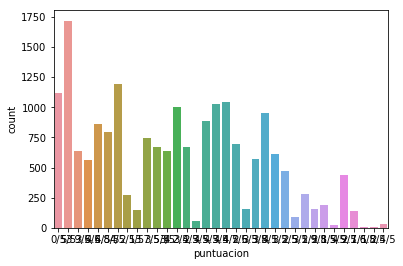

In [39]:
c

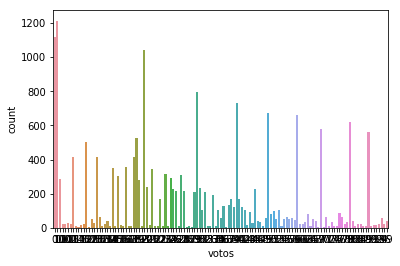

In [40]:
sns.countplot(x="votos", data=df)